In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

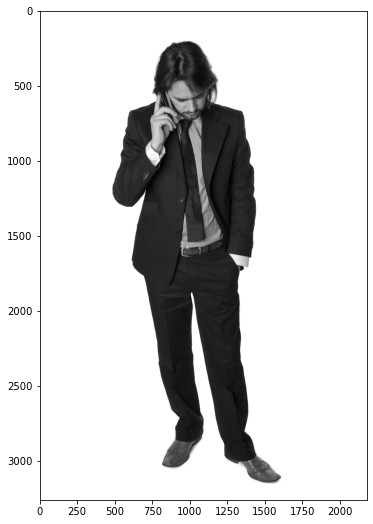

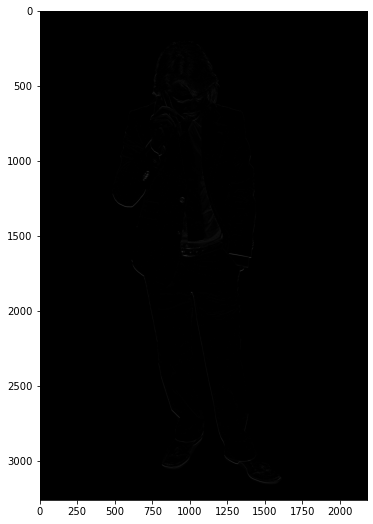

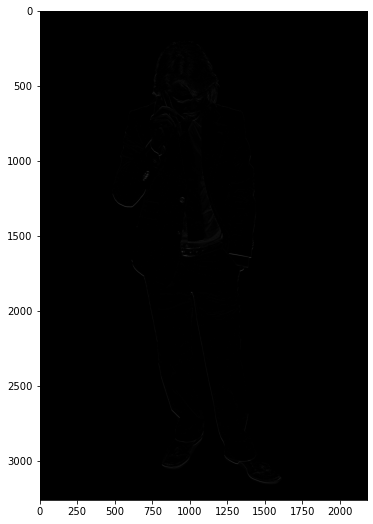

In [5]:
# Reading the image
image_list = [
    "business-man-1238376.jpg",  #        0
    "indian-people-1424719.jpg",  #       1
    "legos-people-group-1240136.jpg",  #  2
    "people-1241254.jpg",  #              3
    "people-1433035.jpg",  #              4
    "people-1498352.jpg",  #              5
    "people-5-1545709.jpg",  #            6
    "people-5-1546139.jpg",  #            7
    "people-listening-1239292.jpg",  #    8
    "cross_walk.jpg",  #                  9
]
image_nr = 0
image = "images/" + image_list[image_nr]


img = cv2.imread(image, cv2.COLOR_RGB2BGR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure( figsize=(16,9))
plt.imshow(img_gray, cmap='gray')
# data[abs(data) < 0.02] = 0

mask_x = np.array([-1,1])
mask_y = mask_x.T

Ix = cv2.filter2D(img_gray, -1, mask_x)
Iy = cv2.filter2D(img_gray, -1, mask_y)

plt.figure(figsize=(16,9))
plt.imshow(Ix, cmap='gray')

plt.figure( figsize=(16,9))
plt.imshow(Iy, cmap='gray')

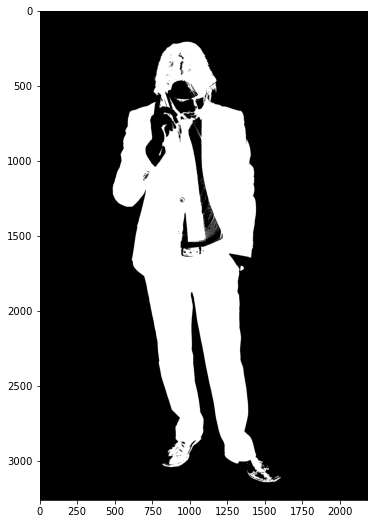

In [6]:
_, binary = cv2.threshold(img_gray, 90, 100, cv2.THRESH_BINARY_INV)

K_2 = np.ones((2,2), dtype='uint8')
binary = cv2.erode(binary, K_2)

plt.figure( figsize=(16,9))
plt.imshow(binary, cmap="gray")
plt.show()

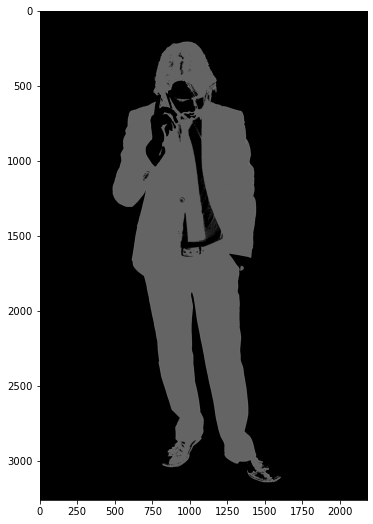

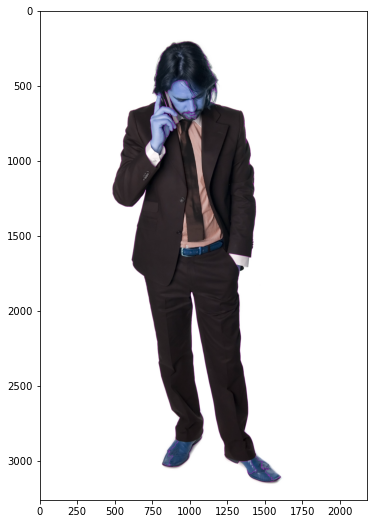

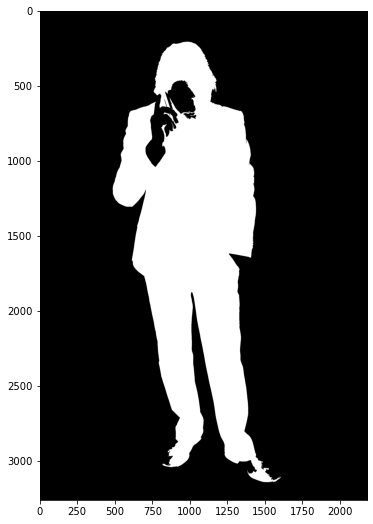

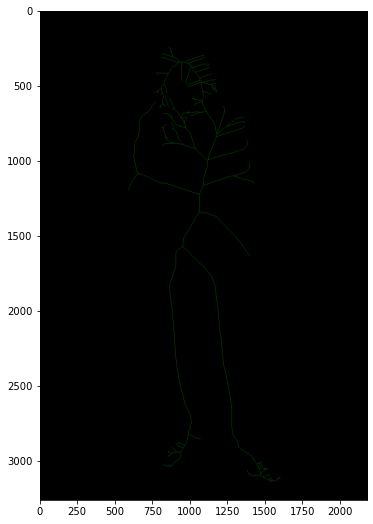

In [7]:
contours, hierarchy= cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
biggest_contour = sorted(contours, key=cv2.contourArea, reverse= True)[0]


''' Contour on binary mask ''' 
cv2.drawContours(binary, [biggest_contour], -1, (255,0,255), 1)
plt.figure( figsize=(16,9))
plt.imshow(binary, cmap='gray')



''' Contour on original picture'''
cv2.drawContours(img, [biggest_contour], -1, (255,0,255), 1)
plt.figure( figsize=(16,9))
plt.imshow(img)

''' Binary mask '''
mask = np.zeros(img.shape, dtype='uint8')   # black image
cv2.drawContours(mask, [biggest_contour], -1, (255,255,255), thickness=cv2.FILLED)
plt.figure( figsize=(16,9))
plt.imshow(mask)

''' Skeletonize'''
from skimage.morphology import skeletonize
mask_skeletonize = skeletonize(mask == 255)
plt.figure( figsize=(16,9))
plt.imshow(mask_skeletonize)